# IR Project 4
## Topic modeling with LDA (Latent Dirichlet Allocation)

### Load libraries and data

In [ ]:
#!pip install pyLDAvis

In [ ]:
# Import libraries
import os
import pickle
import re
import nltk
from nltk.corpus import wordnet as wn
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/IRProject")
os.listdir()

Mounted at /content/drive


['tweet_TR.json',
 'preprocessed_tweets.pickle',
 'tweets_emoSent2.json',
 'TopicModeling (1).ipynb',
 'topicsModel',
 'tweets_emoSentTop.json',
 'tweets_emoSentTopic.json',
 'tweets_emoSentTopics.json',
 'tweets_emoSentTopics2.json',
 'tweets_8Topics.json',
 'words_per_topic.pickle',
 'words_per_topic.json',
 'corpus.pkl',
 'dictionary.gensim',
 'lda.html',
 'tweets_no_dups.json',
 'preprocessed_tweets_no_dups.pickle',
 'model30.gensim.state',
 'model30.gensim',
 'model30.gensim.id2word',
 'model30.gensim.expElogbeta.npy',
 'TopicModeling.ipynb',
 'model10.gensim.state',
 'model10.gensim.id2word',
 'model10.gensim.expElogbeta.npy',
 'model10.gensim',
 'lda_10Topics.html',
 'TopicsPerTweet.csv',
 'tweets_topics_LDA.json',
 'wordCloud.png',
 'wordCloud2.png',
 'wordCloud.ipynb',
 'mallet-2.0.8',
 'dictionary_no_dups.gensim',
 'corpus_no_dups.pkl',
 'Untitled',
 'TopicModelingLDAMallet.ipynb',
 'tweets_keywords.pickle',
 'RAKE.ipynb',
 'preprocessed_all_TR_50638.pickle',
 'corpus_50638.p

Load and prepare data

In [ ]:
# Load data
with open ('preprocessed_all_TR_50638.pickle', 'rb') as json_file:
    tweets = pickle.load(json_file)

In [ ]:
len(tweets)

50638

In [ ]:
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma

'   \nfrom nltk.stem.wordnet import WordNetLemmatizer\ndef get_lemma2(word):\n    return WordNetLemmatizer().lemmatize(word)\n'

In [ ]:
def getWords(docs):
    words = []
    for t in tweets:
        # tokenize
        t = re.split('\s',t)
        #for w in t:
        #  lemma = (get_lemma(w))        
        words.append(t)
    return words

words = getWords(tweets)

In [ ]:
def prepare_text_for_lda(text):
    tokens = text
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [ ]:
import random
text_data = []
for line in words:
    tokens = prepare_text_for_lda(line)
    #if random.random() > .99:
      #print(tokens)
    text_data.append(tokens)

In [ ]:
len(text_data)

50638

In [ ]:
# Create dictionary
from gensim import corpora
dictionary = corpora.Dictionary(text_data)

In [ ]:
# Convert document into the bag-of-words format = list of (token_id, token_count)
corpus = [dictionary.doc2bow(text) for text in text_data]

In [ ]:
# Save corpus and dictionary
import pickle
pickle.dump(corpus, open('corpus_50638.pkl', 'wb'))
dictionary.save('dictionary_50638.gensim')

#### LDA (Latent Dirichlet Allocation)
Code adapted from https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/topic_modeling_Gensim.ipynb

LDA Parameters:
- num_topics: number of requested latent topics to be extracted from the training corpus.
- id2word: apping from word IDs to words. It is used to determine the vocabulary size, as well as for debugging and topic printing.
- passes: number of passes through the corpus during training.

In [ ]:
import gensim

In [ ]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word=dictionary, passes=15)
ldamodel.save('model10_50638.gensim')

In [ ]:
topics = ldamodel.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.114*"corona" + 0.031*"third" + 0.023*"mask" + 0.020*"government" + 0.020*"minister"')
(1, '0.042*"immunity" + 0.035*"south" + 0.034*"positive" + 0.034*"kovid" + 0.032*"africa"')
(2, '0.034*"hospital" + 0.016*"health" + 0.015*"ministry" + 0.014*"pollution" + 0.013*"clean"')
(3, '0.046*"corona" + 0.045*"virus" + 0.030*"covid" + 0.019*"vaccine" + 0.018*"variant"')
(4, '0.071*"india" + 0.057*"case" + 0.048*"covid" + 0.029*"death" + 0.028*"country"')
(5, '0.101*"variant" + 0.096*"omicron" + 0.041*"omikron" + 0.041*"coronavirus" + 0.023*"omicronvariant"')
(6, '0.028*"symptom" + 0.023*"lockdown" + 0.022*"oxygen" + 0.013*"people" + 0.012*"control"')
(7, '0.011*"travel" + 0.011*"quarantine" + 0.011*"abroad" + 0.009*"speak" + 0.009*"foreign"')
(8, '0.037*"distance" + 0.036*"social" + 0.014*"online" + 0.010*"follow" + 0.010*"hospital"')
(9, '0.051*"vaccine" + 0.024*"kovid" + 0.023*"covid" + 0.022*"vaccination" + 0.021*"third"')


In [ ]:
top_topics = list(ldamodel.top_topics(corpus))
print(top_topics)

[([(0.07135971, 'india'), (0.05724767, 'case'), (0.048060555, 'covid'), (0.028966857, 'death'), (0.028270813, 'country'), (0.022710573, 'kovid'), (0.021391839, 'health'), (0.019754205, 'government'), (0.019091055, 'november'), (0.017754292, 'hours'), (0.017613858, 'infect'), (0.01731165, 'karnataka'), (0.0153277125, 'coronavirus'), (0.014313786, 'people'), (0.014004671, 'world'), (0.0119566275, 'patient'), (0.011581479, 'coronavirusupdates'), (0.010845227, 'million'), (0.010704354, 'found'), (0.010533508, 'report')], -3.3922717103827167), ([(0.1012586, 'variant'), (0.09630841, 'omicron'), (0.041077543, 'omikron'), (0.040687308, 'coronavirus'), (0.02326042, 'omicronvariant'), (0.016822273, 'country'), (0.016167475, 'delta'), (0.015666608, 'omicronvarient'), (0.015410218, 'covid'), (0.013323171, 'found'), (0.011340408, 'first'), (0.009932262, 'preparation'), (0.009543116, 'state'), (0.009395436, 'confirm'), (0.009100606, 'koreona'), (0.008912777, 'need'), (0.008831079, 'covidvariant'), (

#### Visualization with pyLDAvis

In [ ]:
# Load dictionary, corpus and model
dictionary = gensim.corpora.Dictionary.load('dictionary_50638.gensim')
corpus = pickle.load(open('corpus_50638.pkl', 'rb'))
ldamodel = gensim.models.ldamodel.LdaModel.load('model10_50638.gensim')

In [ ]:
# Prepare and display visualization
import pyLDAvis
import pyLDAvis.gensim_models
lda_display = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [ ]:
# Save plot as html file
pyLDAvis.save_html(lda_display, 'lda_10Topics_50638.html')

Create data frame with topics per tweet

Adapted from https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#16buildingldamalletmodel

In [ ]:
# Get topic per tweet
def format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=tweets):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)
    

In [ ]:
# To display the entire table and be able to inspect topics
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
# Visualize data frame
import pandas as pd
df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=tweets)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(50)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,6.0,0.3716,"symptom, lockdown, oxygen, people, control, pl...",light menorah white house jewish families plac...
1,1,6.0,0.5907,"symptom, lockdown, oxygen, people, control, pl...",build back better act one earning less pay sin...
2,2,4.0,0.3096,"india, case, covid, death, country, kovid, hea...",tune first lady vice president second gentlema...
3,3,9.0,0.9100,"vaccine, kovid, covid, vaccination, third, ind...",got covid vaccine june time get booster shot a...
4,4,7.0,0.5293,"travel, quarantine, abroad, speak, foreign, lu...",port action plan already easing bottlenecks go...
5,5,6.0,0.6915,"symptom, lockdown, oxygen, people, control, pl...",one republican senator said rising prices “a g...
6,6,2.0,0.8200,"hospital, health, ministry, pollution, clean, ...",tune deliver remarks commemorate world aids day
7,7,2.0,0.4018,"hospital, health, ministry, pollution, clean, ...",tune deliver remarks work strengthen nation su...
8,8,9.0,0.5857,"vaccine, kovid, covid, vaccination, third, ind...",vaccinated still worried omicron go get booste...
9,9,6.0,0.6390,"symptom, lockdown, oxygen, people, control, pl...",every american family deserves affordable chil...


In [ ]:
# Save data frame to csv file
df_dominant_topic.to_csv('TopicsPerTweet_50638.csv')

Extract topics and keywords

In [ ]:
# Create dictionary with topics names and topics
dicTopicNames = {
    0: '1_Corona_Masks_Government',
    1: '2_Immunity_Positive_South_Africa',
    2: '3_Hospital_Health',
    3: '4_Coronavirus',
    4: '5_India_Covid_Cases',
    5: '6_Omicron_Variant',
    6: '7_Symptoms_Lockdown',
    7: '8_Travel_Quarantine',
    8: '9_Social_Distance',
    9: '10_Covid_Vaccination'
}

In [ ]:
dicTopicKeywords = {}
for t in topics:
  dicTopicKeywords.update({t[0]:t[1]})
dicTopicKeywords

{0: '0.114*"corona" + 0.031*"third" + 0.023*"mask" + 0.020*"government" + 0.020*"minister"',
 1: '0.042*"immunity" + 0.035*"south" + 0.034*"positive" + 0.034*"kovid" + 0.032*"africa"',
 2: '0.034*"hospital" + 0.016*"health" + 0.015*"ministry" + 0.014*"pollution" + 0.013*"clean"',
 3: '0.046*"corona" + 0.045*"virus" + 0.030*"covid" + 0.019*"vaccine" + 0.018*"variant"',
 4: '0.071*"india" + 0.057*"case" + 0.048*"covid" + 0.029*"death" + 0.028*"country"',
 5: '0.101*"variant" + 0.096*"omicron" + 0.041*"omikron" + 0.041*"coronavirus" + 0.023*"omicronvariant"',
 6: '0.028*"symptom" + 0.023*"lockdown" + 0.022*"oxygen" + 0.013*"people" + 0.012*"control"',
 7: '0.011*"travel" + 0.011*"quarantine" + 0.011*"abroad" + 0.009*"speak" + 0.009*"foreign"',
 8: '0.037*"distance" + 0.036*"social" + 0.014*"online" + 0.010*"follow" + 0.010*"hospital"',
 9: '0.051*"vaccine" + 0.024*"kovid" + 0.023*"covid" + 0.022*"vaccination" + 0.021*"third"'}

In [ ]:
# Save dics as json
import json

with open("topicNames.json", "w+") as jsonFile: 
  jsonFile.write(json.dumps(dicTopicNames))

with open("topicKeywords.json", "w+") as jsonFile: 
  jsonFile.write(json.dumps(dicTopicKeywords))

In [ ]:
#############################

Compute perplexixity and coherence and fit models with different number of topics

In [ ]:
# Gensim
import gensim
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

# Model with 20 topics:
#Perplexity:  -10.13703593075333
#Coherence Score:  0.30908759216773296

# Model with 10 topics:
#Perplexity:  -9.212064393178444
#Coherence Score:  0.2780567324232014


Perplexity:  -9.212064393178444

Coherence Score:  0.2780567324232014


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        #model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=text_data, start=30, limit=100, step=6)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


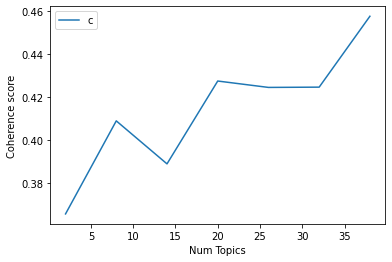

In [ ]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

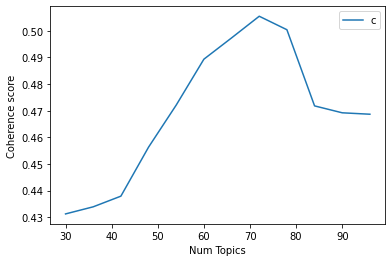

In [ ]:
# Show graph
limit=100; start=30; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 30  has Coherence Value of 0.4313
Num Topics = 36  has Coherence Value of 0.4339
Num Topics = 42  has Coherence Value of 0.4379
Num Topics = 48  has Coherence Value of 0.4563
Num Topics = 54  has Coherence Value of 0.4721
Num Topics = 60  has Coherence Value of 0.4893
Num Topics = 66  has Coherence Value of 0.4973
Num Topics = 72  has Coherence Value of 0.5055
Num Topics = 78  has Coherence Value of 0.5004
Num Topics = 84  has Coherence Value of 0.4718
Num Topics = 90  has Coherence Value of 0.4692
Num Topics = 96  has Coherence Value of 0.4687
